In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%mkdir '/content/FloodNet'
%cd '/content/FloodNet'
!unzip '/content/drive/MyDrive/Post-Flood Disaster Management/Code/Segmentation/floodnet.zip'

In [ ]:
%cd '/content/drive/MyDrive/Post-Flood Disaster Management/Mask2Former'
%ls

/content/drive/.shortcut-targets-by-id/1_b4qbpFZKQVKR45o506yBbBs9kuahEZC/Post-Flood Disaster Management/Mask2Former
 config.py            __pycache__/
 custom_datasets.py   terminal.ipynb
 engine.py            test.py
 infer_image.py      'training_(swin_large-50_epochs)-(320x320).ipynb'
 infer_video.py      'training_(swin_large-50_epochs).ipynb'
 model.py            'training_(swin_tiny-50_epochs).ipynb'
 notebooks/           train.py
 outputs/             utils.py


In [ ]:
!pip install evaluate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 23.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 215.9 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 25.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 19.3 MB/s eta 0:00:00


In [ ]:
import torch
import transformers
import evaluate

torch.__version__, transformers.__version__, evaluate.__version__

('2.2.1+cu121', '4.38.2', '0.4.1')

In [ ]:
!python train.py --backbone 'facebook/mask2former-swin-large-ade-semantic' --batch 24 --imgsz 320 320 --lr 0.0001 --epochs 30

2024-03-25 05:59:36.140112: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-25 05:59:36.140162: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-25 05:59:36.141886: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-25 05:59:37.338146: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Namespace(epochs=30, lr=0.0001, batch=24, imgsz=[320, 320], backbone='facebook/mask2former-swin-large-ade-semantic', scheduler=False, scheduler_epochs=[50])
Some weights of Mask2FormerForUniversalSegmentation were not initialized from the mo

due to code is depenedant to complete the training and then plot the loss and miou curve so i have created manually by statically adding data into csv and plot the curves

In [2]:
import pandas as pd

df = pd.read_csv('outputs/loss_and_miou.csv')
df.head(2)

,epoch,train/loss,train/miou,val/loss,val/miou
0,1,44.9648,0.344112,32.3910,0.568855
1,2,32.2069,0.625751,28.3111,0.683931


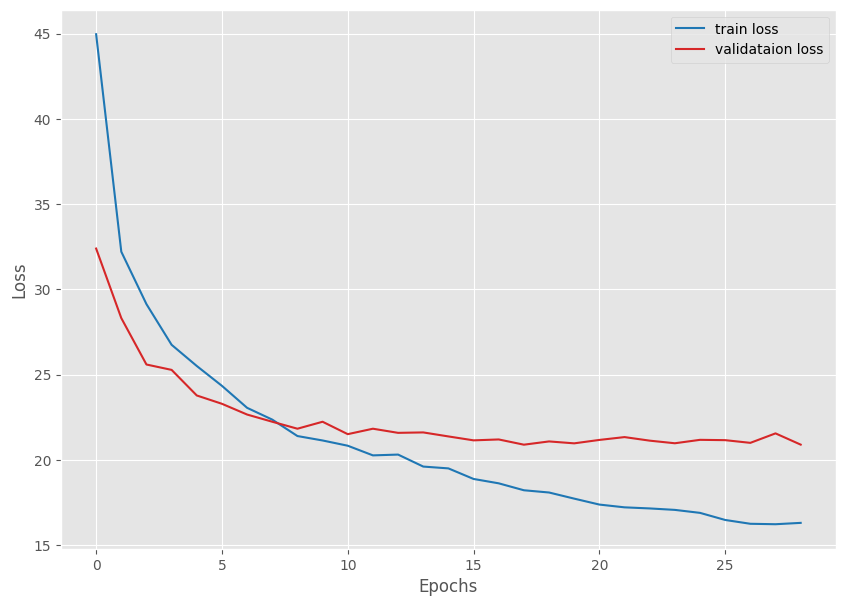

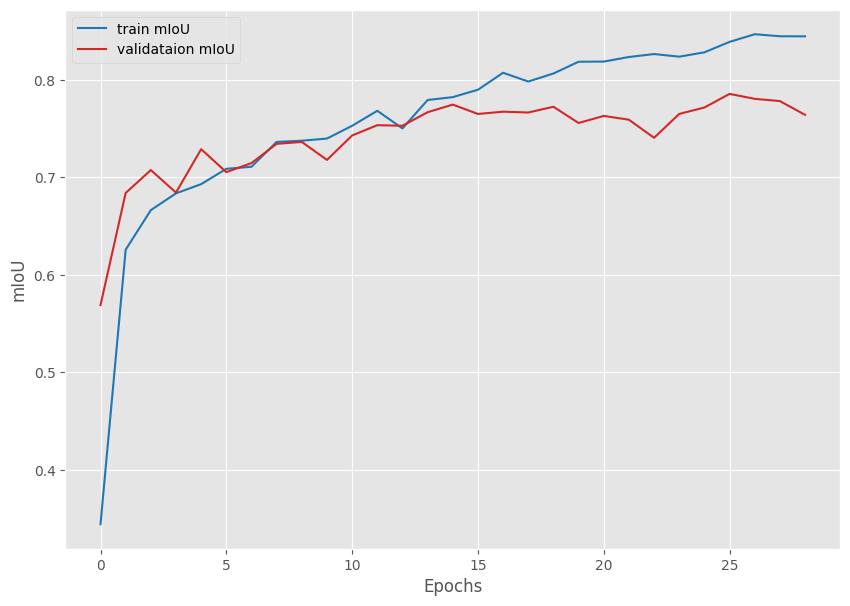

In [5]:
from utils import save_plots

train_loss, train_miou = [], []
valid_loss, valid_miou = [], []

# Load the data into arrays from dataframe
for i in range(len(df)):
    train_loss.append(df['train/loss'][i])
    train_miou.append(df['train/miou'][i])
    valid_loss.append(df['val/loss'][i])
    valid_miou.append(df['val/miou'][i])

save_plots(
            train_loss, valid_loss,
            train_miou, valid_miou, 
            'outputs'
        )

In [1]:
!python test.py --model outputs/model_iou/ --batch 16 --imgsz 320 320

Namespace(batch=16, imgsz=[320, 320], model='outputs/model_iou/')
Validating
Namespace(batch=16, imgsz=[320, 320], model='outputs/model_iou/')
Namespace(batch=16, imgsz=[320, 320], model='outputs/model_iou/')
Namespace(batch=16, imgsz=[320, 320], model='outputs/model_iou/')
Namespace(batch=16, imgsz=[320, 320], model='outputs/model_iou/')
Namespace(batch=16, imgsz=[320, 320], model='outputs/model_iou/')
Namespace(batch=16, imgsz=[320, 320], model='outputs/model_iou/')
Namespace(batch=16, imgsz=[320, 320], model='outputs/model_iou/')
Namespace(batch=16, imgsz=[320, 320], model='outputs/model_iou/')
IOU Each Class: 
Building-flooded: 0.7235564507216337
Building-non-flooded: 0.8096273801941979
Road-flooded: 0.7122653683493275
Road-non-flooded: 0.8546088562969417
Water: 0.849247670925152
Tree: 0.8543038891262236
Vehicle: 0.5744956248261698
Pool: 0.6754895218059713
Grass: 0.9181559424581479

Test mIOU: 0.7746
TESTING COMPLETE



100%|████████████████████| 28/28 [05:30<00:00, 11.81s/it]
